In [1]:
# Reference taken from Scikitlearn documnetation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features
y = iris.target

In [3]:
# we create an instance of SVM and fit out data. We do not scale our  data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
svc = svm.SVC(kernel='linear',C=1,gamma='auto').fit(X, y)

In [4]:
# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))

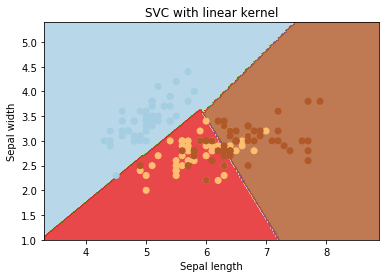

In [5]:
plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [13]:
# Reference taken from Scikitlearn documnetation https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

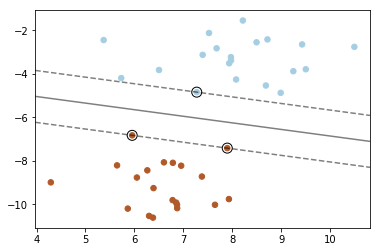

In [19]:
# we create 40 separable points svm.SVC(kernel='linear', C=1000)
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, not regularized for illustration purposes
C = 1.0 
clf = svm.SVC(kernel='linear', C=1000,gamma='auto')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,linewidth=1, facecolors='none', edgecolors='k')
plt.show()